# Importing the libraries

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading the data

In [2]:
with open("bbc-text.csv") as f:
    csv_file = pd.read_csv(f)

In [3]:
csv_file

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [5]:
articles = []
labels = []

with open("./bbc-text.csv", 'r') as csvfile:
    
    ### START CODE HERE
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        articles.append(sentence)
    ### END CODE HERE

print(len(labels))
print(len(articles))
print(articles[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

# Preprocessing the data

### Splitting the data into train set and test set

In [7]:
test_ratio = 0.1

training_data = articles[int(len(articles)*0.1):]
testing_data = articles[:int(len(articles)*0.1)]
training_labels = labels[int(len(articles)*0.1):]
testing_labels = labels[:int(len(articles)*0.1)]

### Defining the hyperparameters

In [8]:
vocab_size = 100000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

### Tokenizing the input data

In [9]:
# Defining the tokenizer object
tokenizer_for_articles = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer_for_labels = Tokenizer()

# Fitting the data to get the encoded values for the words
tokenizer_for_articles.fit_on_texts(training_data)
tokenizer_for_labels.fit_on_texts(labels)

# Getting a sequence for each sentence
training_sequences = tokenizer_for_articles.texts_to_sequences(training_data)
testing_sequences = tokenizer_for_articles.texts_to_sequences(testing_data)
tr_label_sequences = tokenizer_for_labels.texts_to_sequences(training_labels)
te_label_sequences = tokenizer_for_labels.texts_to_sequences(testing_labels)
train_labels = np.array(tr_label_sequences)
test_labels = np.array(te_label_sequences)

# Getting a proper matrix of values with different padding settings
training_padded = pad_sequences(training_sequences, padding = padding_type, maxlen=max_length)
testing_padded = pad_sequences(testing_sequences, padding = padding_type, maxlen = max_length)

# Defining the model

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')
])

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           1600000   
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 24)                46104     
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 1,646,254
Trainable params: 1,646,254
Non-trainable params: 0
_________________________________________________________________


Note that the 'sparse_categorical_crossentropy' loss is used here, and not 'binary_crossentropy' loss.

# Training the model

In [14]:
num_epochs = 30

history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels), verbose=2)

Epoch 1/30
63/63 - 2s - loss: 1.7456 - accuracy: 0.2551 - val_loss: 1.6392 - val_accuracy: 0.2973 - 2s/epoch - 30ms/step
Epoch 2/30
63/63 - 1s - loss: 1.2856 - accuracy: 0.5856 - val_loss: 1.0154 - val_accuracy: 0.7207 - 1s/epoch - 18ms/step
Epoch 3/30
63/63 - 1s - loss: 0.3476 - accuracy: 0.9840 - val_loss: 0.3934 - val_accuracy: 0.9414 - 1s/epoch - 18ms/step
Epoch 4/30
63/63 - 1s - loss: 0.0484 - accuracy: 0.9995 - val_loss: 0.2701 - val_accuracy: 0.9369 - 1s/epoch - 18ms/step
Epoch 5/30
63/63 - 1s - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.9369 - 1s/epoch - 17ms/step
Epoch 6/30
63/63 - 2s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2118 - val_accuracy: 0.9414 - 2s/epoch - 25ms/step
Epoch 7/30
63/63 - 2s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1993 - val_accuracy: 0.9414 - 2s/epoch - 26ms/step
Epoch 8/30
63/63 - 1s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1905 - val_accuracy: 0.9414 - 1s/epoch - 23ms/step
Epoch 9/30
63/63 - 1s - loss: 0.

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape

(100000, 16)

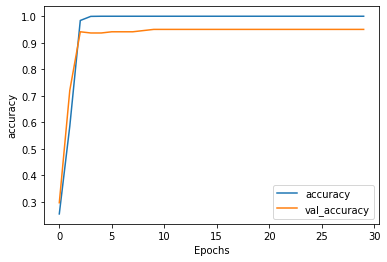

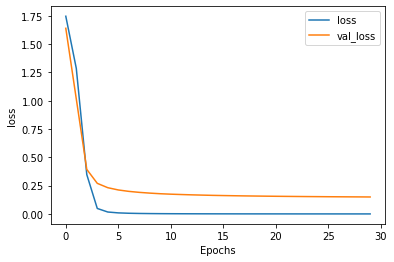

In [16]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")